<a href="https://colab.research.google.com/github/kipruto45/kipruto45/blob/main/Heart_Disease_Prediction%7B0_99%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mahatiratusher_heart_disease_risk_prediction_dataset_path = kagglehub.dataset_download('mahatiratusher/heart-disease-risk-prediction-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-risk-prediction-dataset/heart_disease_risk_dataset_earlymed.xls
/kaggle/input/heart-disease-risk-prediction-dataset/heart_disease_risk_dataset_earlymed.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/kaggle/input/heart-disease-risk-prediction-dataset/heart_disease_risk_dataset_earlymed.csv")

In [ ]:
data.sample()

Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
52458         1.0                  1.0      1.0           1.0        1.0   

       Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
52458       1.0                 1.0                 1.0      1.0   

       High_Cholesterol  Diabetes  Smoking  Obesity  Sedentary_Lifestyle  \
52458               0.0       1.0      1.0      1.0                  0.0   

       Family_History  Chronic_Stress  Gender   Age  Heart_Risk  
52458             1.0             1.0     0.0  72.0         1.0

In [ ]:
print(data.isnull().sum())
print(data.info())

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6 

In [ ]:
X = data.drop('Heart_Risk',axis =1)
y = data['Heart_Risk']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =42)

In [ ]:
print(X_train,"\n")
print(y_train,"\n")
print(X_test,"\n")
print(y_test)

       Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
68681         0.0                  0.0      0.0           0.0        0.0   
19961         0.0                  0.0      1.0           0.0        0.0   
11040         1.0                  1.0      0.0           1.0        1.0   
27673         1.0                  0.0      1.0           0.0        0.0   
22876         1.0                  1.0      1.0           1.0        1.0   
...           ...                  ...      ...           ...        ...   
37194         1.0                  1.0      1.0           1.0        1.0   
6265          0.0                  0.0      0.0           0.0        0.0   
54886         1.0                  1.0      1.0           1.0        1.0   
860           1.0                  1.0      1.0           1.0        0.0   
15795         0.0                  0.0      0.0           1.0        0.0   

       Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
68681       0.0    

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data.describe())

         Chest_Pain  Shortness_of_Breath       Fatigue  Palpitations  \
count  70000.000000         70000.000000  70000.000000  70000.000000   
mean       0.499229             0.500586      0.498571      0.498729   
std        0.500003             0.500003      0.500002      0.500002   
min        0.000000             0.000000      0.000000      0.000000   
25%        0.000000             0.000000      0.000000      0.000000   
50%        0.000000             1.000000      0.000000      0.000000   
75%        1.000000             1.000000      1.000000      1.000000   
max        1.000000             1.000000      1.000000      1.000000   

          Dizziness      Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  \
count  70000.000000  70000.000000        70000.000000        70000.000000   
mean       0.501414      0.498929            0.501500            0.502457   
std        0.500002      0.500002            0.500001            0.499998   
min        0.000000      0.000000          

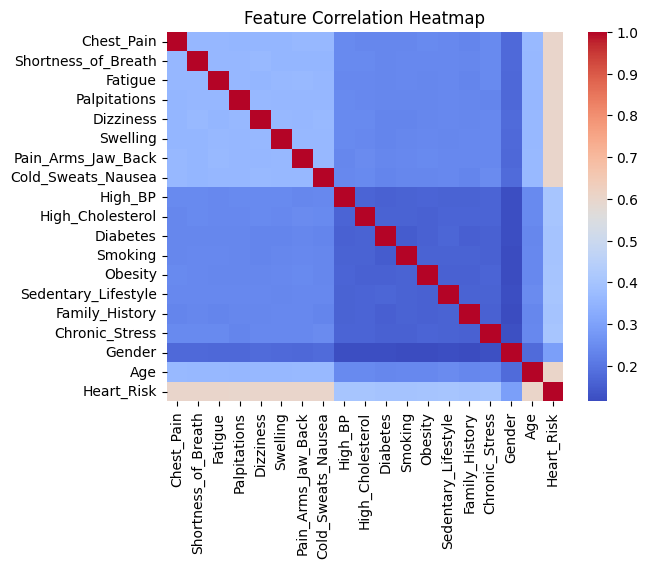

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot= False, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

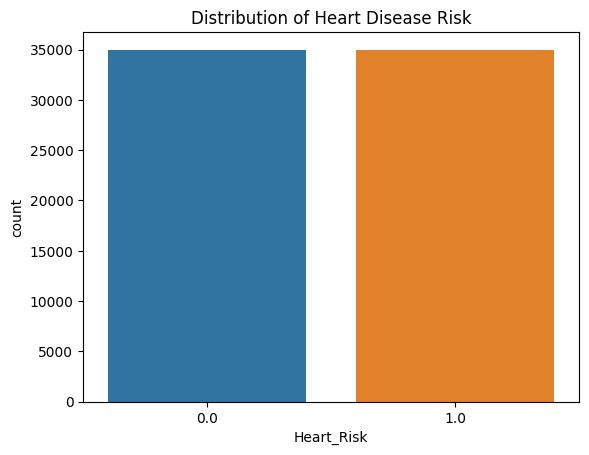

In [ ]:
sns.countplot(x='Heart_Risk', data=data)
plt.title('Distribution of Heart Disease Risk')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)

Logistic Regression Accuracy: 0.99
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10515
         1.0       0.99      0.99      0.99     10485

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000

[[10419    96]
 [   72 10413]]
--------------------------------------------------
Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10515
         1.0       0.99      0.99      0.99     10485

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000

[[10423    92]
 [   73 10412]]
--------------------------------------------------
Gradient Boosting Accuracy: 0.99
              precision    recall  f1-score   support

         0.0       0.99      0

In [ ]:
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train_scaled,y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = gb_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Gradient Boosting Accuracy: 0.9931
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10515
         1.0       0.99      0.99      0.99     10485

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000

Confusion Matrix:
[[10426    89]
 [   55 10430]]


In [ ]:

feature_importances = gb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                Feature  Importance
17                  Age    0.324382
4             Dizziness    0.108383
7    Cold_Sweats_Nausea    0.107293
5              Swelling    0.103729
2               Fatigue    0.093096
6    Pain_Arms_Jaw_Back    0.075881
0            Chest_Pain    0.075692
1   Shortness_of_Breath    0.056857
3          Palpitations    0.037114
15       Chronic_Stress    0.002561
13  Sedentary_Lifestyle    0.002471
11              Smoking    0.002262
9      High_Cholesterol    0.002109
8               High_BP    0.002097
10             Diabetes    0.002014
12              Obesity    0.001911
14       Family_History    0.001849
16               Gender    0.000298


In [ ]:
import joblib
joblib.dump(gb_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']